# Collapse probability

In [16]:
import time as tm
import scipy.stats as stats

exec(open("object.py").read(), globals())
exec(open("variability.py").read(), globals())

In [128]:
Param_phy= [0.2, 6]      # 0.2, 10
      
#Init = [0.5, Param_phy[1]]
Init = [0.8, 10]

Param_freq = {"p":  1.} #2
dt = 0.1
finalTime = 100
Param_strength = {"scale":0.0008} # 0.0008
Param_coupled = {"alpha":50, # 20
                 "beta":30} # 500


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

In [29]:
FinalTime =  np.array([5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 200, 250, 300, 350, 400, 500, 600, 800, 1000])
numberOfSimulation = 1000 # 50 or 100 should be enough, it's just to have a really smooth functions
Collapse = np.zeros((len(FinalTime), numberOfSimulation))
for j in range(numberOfSimulation):
    for i, finalTime in enumerate(FinalTime):    
        O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
        O.solve_by_part()
        Collapse[i, j] = collapse([O.N, O.W])
#    plt.plot(FinalTime, Collapse[:,j], "*")

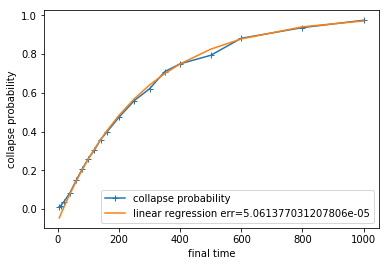

In [137]:
plt.plot(FinalTime, np.mean(Collapse, axis = 1),"-+",  label="collapse probability")

a, b, coef, p_value, err = stats.linregress(FinalTime, -np.log(1-np.mean(Collapse, axis = 1)))
plt.plot(FinalTime, 1-np.exp(-(a*FinalTime+b)), label="linear regression err="+str(err))
plt.xlabel("final time")
plt.ylabel("collapse probability")
plt.legend()
plt.show()

In [129]:
FinalTime2 =  np.array([2, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100])
numberOfSimulation = 50 # 50 or 100 should be enough, it's just to have a really smooth functions
Collapse2 = np.zeros((len(FinalTime2), numberOfSimulation))
for j in range(numberOfSimulation):
    for i, finalTime in enumerate(FinalTime2):    
        O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
        O.solve_by_part()
        Collapse2[i, j] = collapse([O.N, O.W])

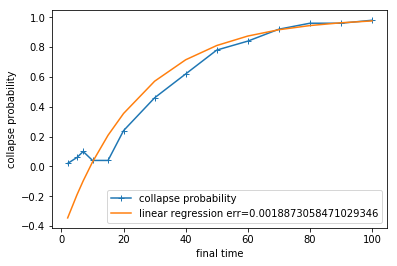

In [151]:
plt.plot(FinalTime2, np.mean(Collapse2, axis = 1),"-+",  label="collapse probability")

a, b, coef, p_value, err = stats.linregress(FinalTime2, -np.log(1-np.mean(Collapse2, axis = 1)))
plt.plot(FinalTime2, 1-np.exp(-(a*FinalTime2+b)), label="linear regression err="+str(err))
plt.xlabel("final time")
plt.ylabel("collapse probability")
plt.legend()
plt.show()

In [148]:
1-np.exp(-a*100)

0.9831608674456639

In [149]:
a

0.04084049782519864